<a href="https://colab.research.google.com/github/pathakswetank/Sports-Analysis/blob/main/IPL_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


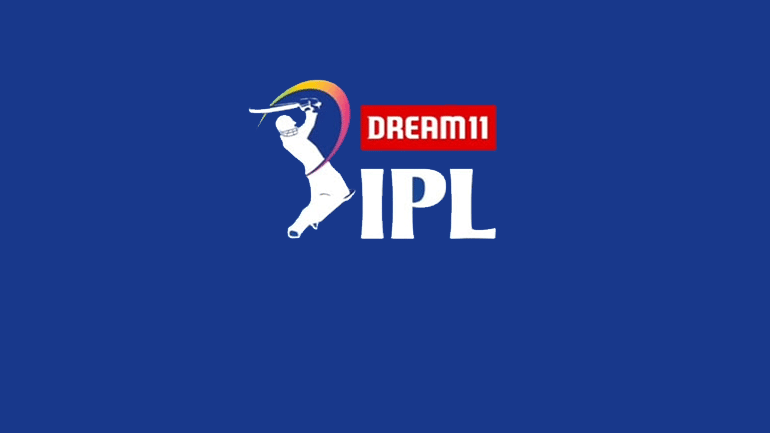

## **The aim of the analysis is to tier the player as per their batting performance.**

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df= pd.read_excel("/content/drive/My Drive/Data Science Project/IPL 2020.xlsx", sheet_name= "BAT")

In [3]:
df.head()

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.6,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30


There are following features in a data set:
- POS : Postion of the Batsmen 
- PLAYER: Name of the Player
- Mat: Number of Matched Played
- Inns: Number of Innings Played
- NO: Not Out
- Runs: Total Runs Scored in a Session
- HS: Highest Score
- Avg: Batsmen's Average
- BF: Ball Faced
- SR: Strike Rate
- 100 : How many century scored?
- 50: How many half century scored?
- 4s: Number of fours hit by batsman
- 6s: Number of sixes hit by batsman


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     100 non-null    int64  
 1   PLAYER  100 non-null    object 
 2   Mat     100 non-null    int64  
 3   Inns    100 non-null    int64  
 4   NO      100 non-null    int64  
 5   Runs    100 non-null    int64  
 6   HS      100 non-null    object 
 7   Avg     100 non-null    object 
 8   BF      100 non-null    int64  
 9   SR      100 non-null    float64
 10  100     100 non-null    int64  
 11  50      100 non-null    int64  
 12  4s      100 non-null    int64  
 13  6s      100 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 11.1+ KB


In [5]:
df.Avg.value_counts()

-        4
25       2
5        2
13       2
16.5     2
        ..
22.2     1
18.5     1
8.5      1
12.33    1
15       1
Name: Avg, Length: 92, dtype: int64

In [6]:
df["Avg"]= df["Avg"].replace("-","0")

In [7]:
df.Avg

0     55.83
1     44.14
2     39.14
3      34.6
4     57.33
      ...  
95        4
96        6
97        0
98       11
99        5
Name: Avg, Length: 100, dtype: object

In [8]:
df.Avg = df.Avg.astype("float")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     100 non-null    int64  
 1   PLAYER  100 non-null    object 
 2   Mat     100 non-null    int64  
 3   Inns    100 non-null    int64  
 4   NO      100 non-null    int64  
 5   Runs    100 non-null    int64  
 6   HS      100 non-null    object 
 7   Avg     100 non-null    float64
 8   BF      100 non-null    int64  
 9   SR      100 non-null    float64
 10  100     100 non-null    int64  
 11  50      100 non-null    int64  
 12  4s      100 non-null    int64  
 13  6s      100 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 11.1+ KB


In [10]:
df.columns

Index([   'POS', 'PLAYER',    'Mat',   'Inns',     'NO',   'Runs',     'HS',
          'Avg',     'BF',     'SR',      100,       50,     '4s',     '6s'],
      dtype='object')

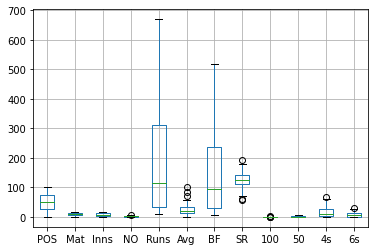

In [11]:
df.boxplot()

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
POS,100.0,50.5000,29.011492,1.00,25.7500,50.500,75.2500,100.00
Mat,100.0,10.3400,4.528741,1.00,7.0000,11.500,14.0000,17.00
Inns,100.0,8.2600,4.758024,1.00,3.7500,8.000,12.0000,17.00
NO,100.0,1.8700,1.618423,0.00,1.0000,1.500,3.0000,7.00
Runs,100.0,184.0100,170.654207,10.00,33.7500,115.000,312.5000,670.00
Avg,100.0,25.0121,17.370565,0.00,13.2475,20.925,34.7300,101.00
BF,100.0,138.8700,124.287680,8.00,29.7500,95.500,236.2500,518.00
SR,100.0,124.9233,26.458145,57.14,110.9850,126.445,140.5625,191.42
100,100.0,0.0500,0.261116,0.00,0.0000,0.000,0.0000,2.00
50,100.0,1.1000,1.459902,0.00,0.0000,0.000,2.0000,5.00


In [13]:
ipl_df= df.drop(columns= ["POS","PLAYER", "HS"])

In [14]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mat     100 non-null    int64  
 1   Inns    100 non-null    int64  
 2   NO      100 non-null    int64  
 3   Runs    100 non-null    int64  
 4   Avg     100 non-null    float64
 5   BF      100 non-null    int64  
 6   SR      100 non-null    float64
 7   100     100 non-null    int64  
 8   50      100 non-null    int64  
 9   4s      100 non-null    int64  
 10  6s      100 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 8.7 KB


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X = StandardScaler()
scaled_df= X.fit_transform(ipl_df)
scaled_df

array([[ 0.81224305,  1.21246081,  0.08072977, ...,  2.68487072,
         2.63482536,  2.04036639],
       [ 1.47801605,  1.84615113,  0.70172801, ...,  1.99644233,
         3.19675494,  0.60898691],
       [ 1.25609171,  1.63492102,  0.08072977, ...,  1.99644233,
         2.26020564,  0.86923772],
       ...,
       [-2.07277325, -1.53353057, -0.54026847, ..., -0.75727123,
        -0.86162536, -0.95251798],
       [-2.07277325, -1.53353057, -1.1612667 , ..., -0.75727123,
        -0.92406198, -0.95251798],
       [-0.51930294, -1.11107036, -0.54026847, ..., -0.75727123,
        -0.92406198, -0.95251798]])

**KMEANS CLUSTERING**

In [17]:
from sklearn.cluster import KMeans

In [18]:
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [19]:
wss

[1099.9999999999998,
 609.6391524262674,
 501.77016801306576,
 417.0838532084898,
 358.3643337793389,
 312.1341078256046,
 286.6966390692882,
 252.97924192135076,
 232.67037678628432,
 211.9358177972207]

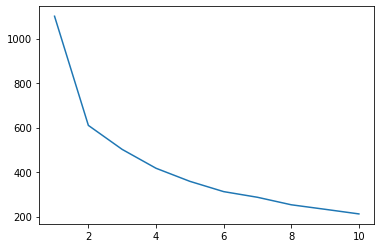

In [20]:
plt.plot(range(1,11), wss)

In [21]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [22]:
df["Clus_kmeans"] = labels
df.head(5)

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Clus_kmeans
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,2
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12,2
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,2
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,2
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,2


In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [24]:
silhouette_score(scaled_df,labels)

0.28923485498939117

In [25]:
sil_width = silhouette_samples(scaled_df,labels)

In [26]:
df["sil_width"] = sil_width
df.head(5)

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Clus_kmeans,sil_width
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,2,0.323432
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12,2,0.182363
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,2,0.441363
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,2,0.415055
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,2,0.339547


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


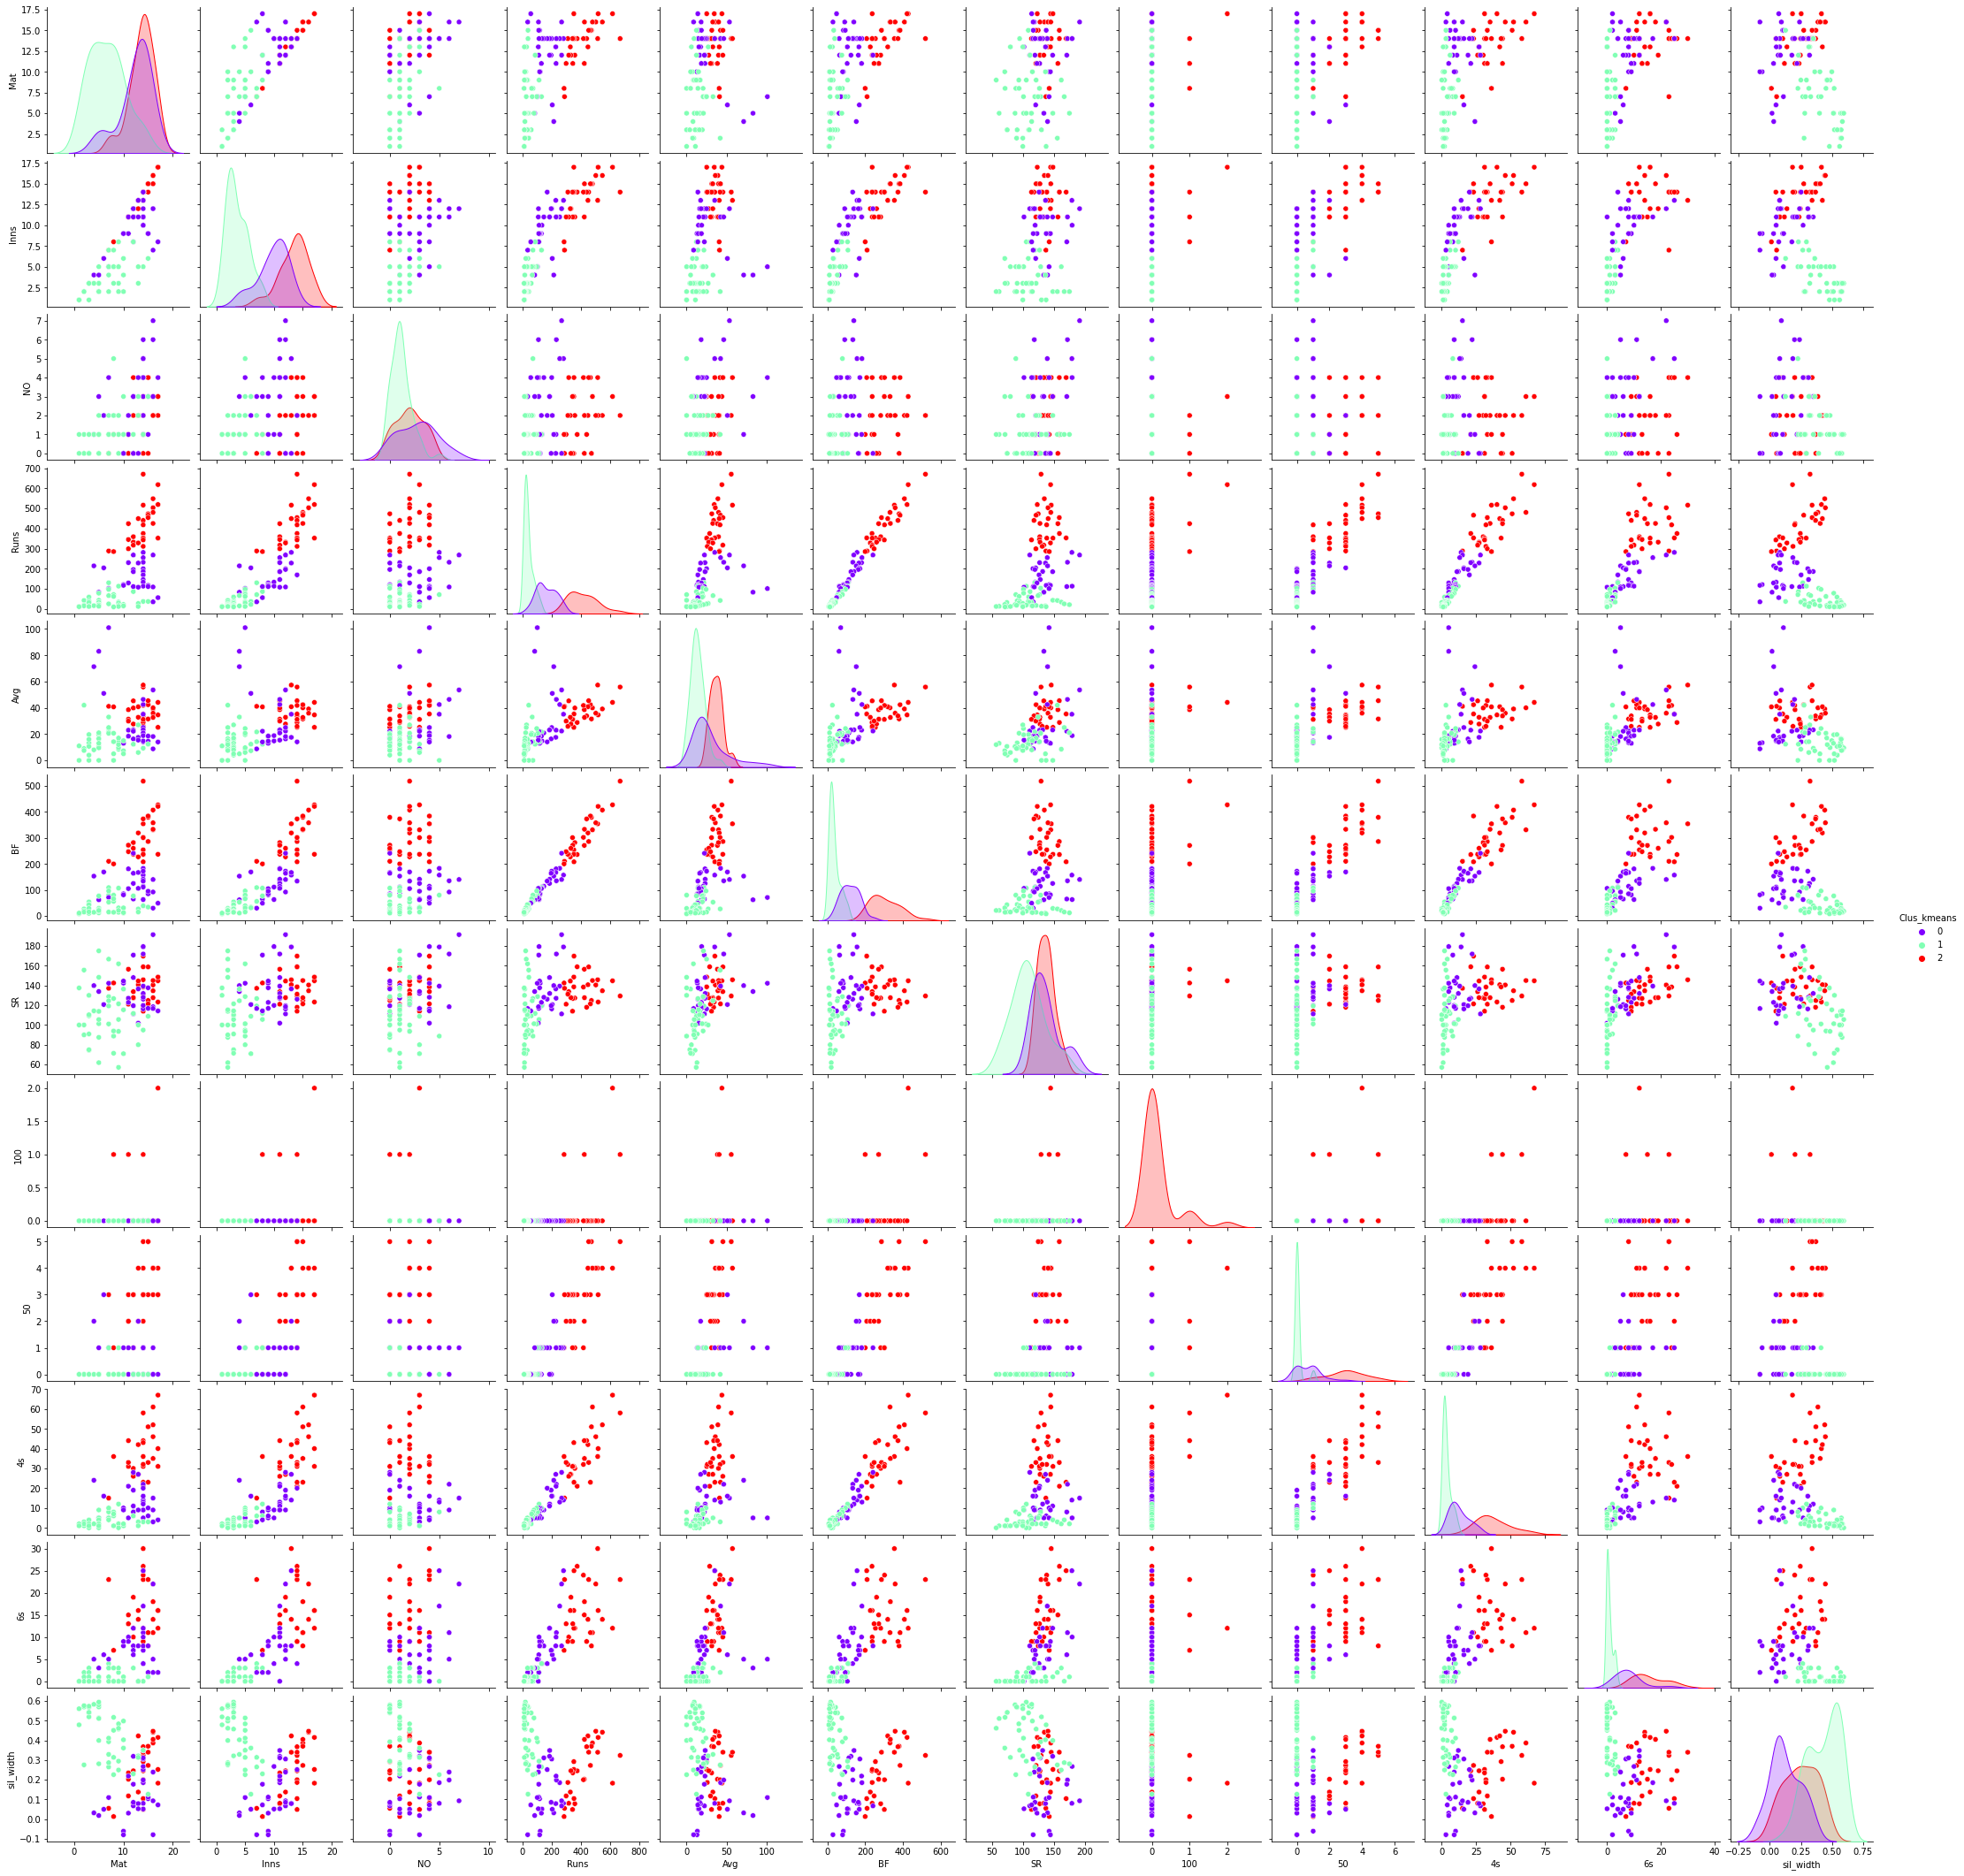

In [27]:
sns.pairplot(df.drop(['PLAYER' , 'HS', 'POS'],axis=1), hue = "Clus_kmeans", palette= "rainbow")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


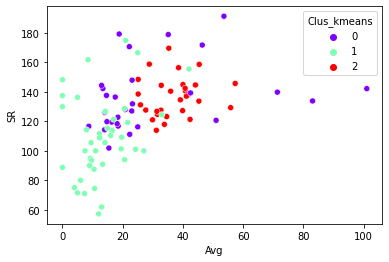

In [28]:
sns.scatterplot(df.Avg, df.SR , hue = df.Clus_kmeans, palette= "rainbow")

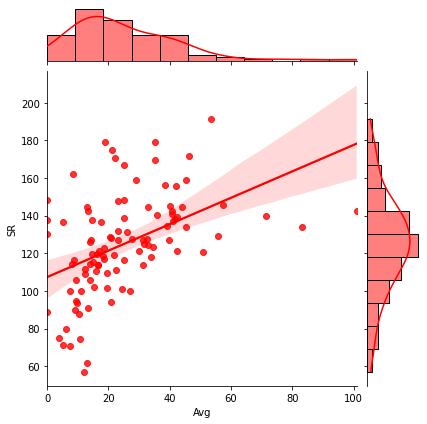

In [29]:
sns.jointplot(data=df, x='Avg', y='SR', kind='reg', color='r')
plt.show()

In [30]:
clust_profile=df.groupby('Clus_kmeans').mean()
clust_profile['freq']=df.Clus_kmeans.value_counts().sort_index()
clust_profile

,POS,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s,sil_width,freq
Clus_kmeans,,,,,,,,,,,,,,
0,45.655172,12.379310,9.793103,2.793103,162.275862,29.639655,119.862069,136.147586,0.000000,0.689655,12.551724,8.103448,0.125098,29
1,78.357143,6.642857,3.642857,1.142857,39.357143,13.511667,36.666667,108.883333,0.000000,0.071429,3.476190,0.880952,0.430813,42
2,15.000000,13.655172,13.413793,2.000000,415.241379,37.040345,305.896552,136.929310,0.172414,3.000000,36.896552,15.862069,0.248328,29


In [31]:
df.head()

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Clus_kmeans,sil_width
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,2,0.323432
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12,2,0.182363
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,2,0.441363
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,2,0.415055
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,2,0.339547


In [32]:
pd.crosstab(df.PLAYER,df.Clus_kmeans).T

PLAYER,AB de Villiers,Aaron Finch,Abdul Samad,Abhishek Sharma,Ajinkya Rahane,Alex Carey,Ambati Rayudu,Andre Russell,Axar Patel,Ben Stokes,Chris Gayle,Chris Jordan,Chris Morris,David Warner,Deepak Hooda,Devdutt Padikkal,Dinesh Karthik,Eoin Morgan,Faf du Plessis,Glenn Maxwell,Gurkeerat Mann Singh,Hardik Pandya,Harshal Patel,Imran Tahir,Ishan Kishan,Isuru Udana,James Pattinson,Jason Holder,Jimmy Neesham,Jofra Archer,Jonny Bairstow,Josh Philippe,Jos Buttler,KL Rahul,Kagiso Rabada,Kamlesh Nagarkoti,Kane Williamson,Karun Nair,Kedar Jadhav,Kieron Pollard,...,Prithvi Shaw,Priyam Garg,Quinton de Kock,Rahul Tewatia,Rahul Tripathi,Rashid Khan,Ravichandran Ashwin,Ravindra Jadeja,Rinku Singh,Rishabh Pant,Riyan Parag,Robin Uthappa,Rohit Sharma,Ruturaj Gaikwad,Sam Curran,Sandeep Sharma,Sanju Samson,Sarfaraz Khan,Saurabh Tiwary,Shane Watson,Shardul Thakur,Shikhar Dhawan,Shimron Hetmyer,Shivam Dube,Shivam Mavi,Shreyas Gopal,Shreyas Iyer,Shubman Gill,Simran Singh,Steve Smith,Sunil Narine,Suryakumar Yadav,Tom Banton,Tom Curran,Tushar Deshpande,Vijay Shankar,Virat Kohli,Washington Sundar,Wriddhiman Saha,Yashasvi Jaiswal
Clus_kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,...,1,1,0,1,1,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0
1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1
2,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0


In [33]:
df.groupby(['PLAYER','Clus_kmeans']).last()

,,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,sil_width
PLAYER,Clus_kmeans,,,,,,,,,,,,,,
AB de Villiers,2,10,15,14,4,454,73*,45.40,286,158.74,0,5,33,23,0.339824
Aaron Finch,0,31,12,12,0,268,52,22.33,241,111.20,0,1,28,8,0.066832
Abdul Samad,0,54,12,8,3,111,33,22.20,65,170.76,0,0,8,6,0.177006
Abhishek Sharma,1,64,8,7,2,71,31,14.20,56,126.78,0,0,6,3,0.313572
Ajinkya Rahane,1,52,9,8,0,113,60,14.12,107,105.60,0,1,12,2,0.294327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vijay Shankar,1,59,7,5,1,97,52*,24.25,96,101.04,0,1,10,1,0.411394
Virat Kohli,2,9,15,15,4,466,90*,42.36,384,121.35,0,3,23,11,0.272548
Washington Sundar,0,53,15,9,3,111,30,18.50,95,116.84,0,0,10,2,0.111444


In [34]:
df.to_csv('ipl_batsmen_tier.csv')

## **Tier 1 Batsmen** - Cluster Label 2
---
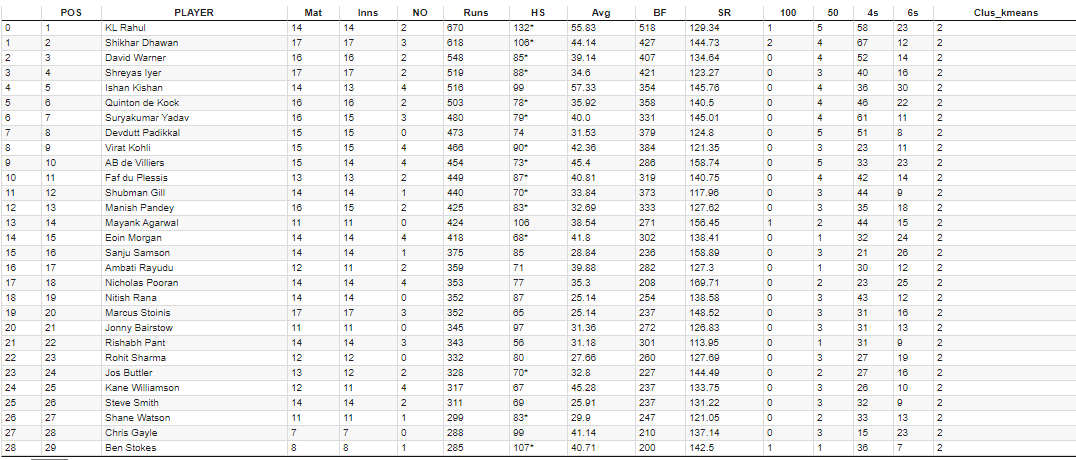
These are those batsmen who performed very well in the IPL 2020 Season:
- Most Runs Scored 
- Highest Averages
- Highest Strike Rate
- Less number in frequency
- Most boundaries hit


---
## **Tier 2 Batsmen** - Cluster Label 0
---

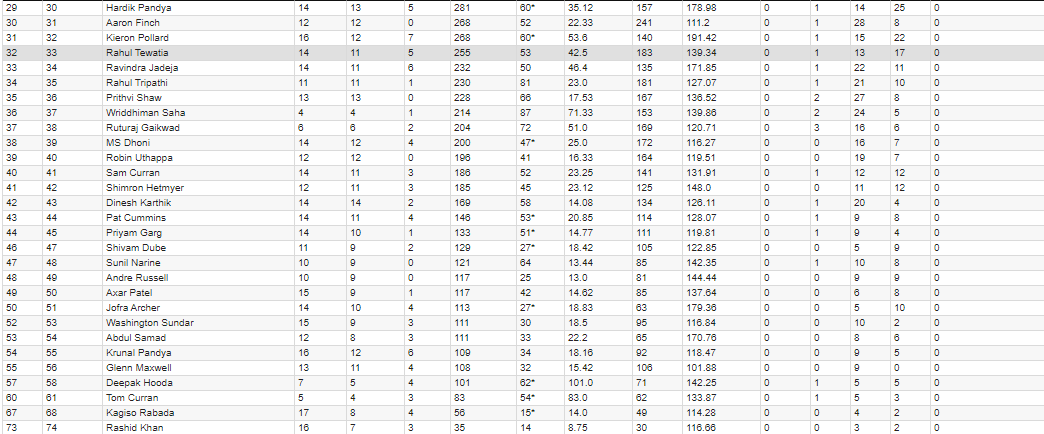

These are those batsmen who performed moderately well in the IPL 2020 Season:
- Huge difference was seen between **Tier** **1** Batsmen Runs Scored and **Tier** **2**
- Moderate Averages
- Strike Rate more a less same as **Tier 1 Batsmen**
---
## **Tier 3 Batsmen** - Cluster Label 1
---
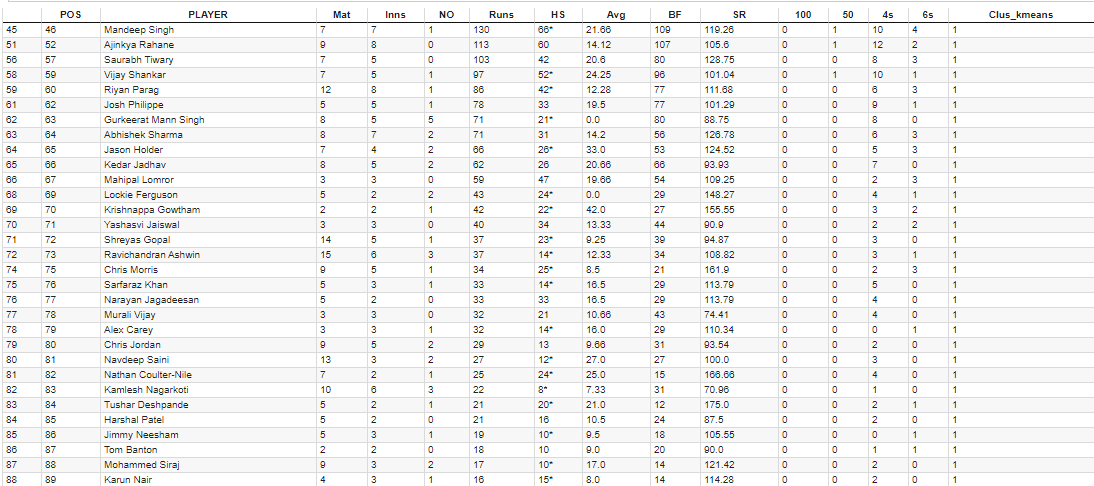

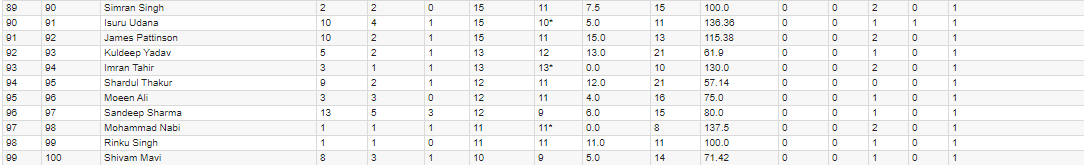
These are those batsmen who performed moderately well in the IPL 2020 Season:
- Least Runs Scored 
- Least Averages
- Least Strike Rate
- More number of players
- Least boundaries hit
---

## HAPPY LEARNING.....!!